# Workshop: Integrating Computational Modeling into Applied Math & Science


### Aaron Titus

### STLinATL, August 3-4, 2021


# Introduction to the Workshop

## Description

Modeling is a significant component of contemporary applied math and science. Computers allow students to model complex phenomena, explore relationships, and make predictions with no previous coding experience. Integrating computational modeling with the traditional algebraic (i.e. analytic) curriculum - of which we are already quite familiar - allows students to explore more complex and relevant problems without sacrificing the traditional learning objectives. In this hands-on workshop, you will use Python to explore system dynamics models in math and science, including the spread of infectious disease, financial forecasting, climate models, and others. No previous coding experience is required.

## STLinATL


One focus of the [STLinATL conference](https://stlinatl.com/about/) is:

"**Real-World STEAM Applications** – Sessions will focus on topics and skills necessary for success in our rapidly evolving world (e.g. STEAM applications to include computational thinking, action research, media literacy, information literacy, making, sustainability, global awareness, AR/VR and more)."

In this workshop we will see examples of integrating coding into math and science courses in order to prepare students for solving problems with computational models.

## Objectives

We will integrate coding into our science and math courses. Therefore, our goal is not to teach general coding. But rather, our goals are to teach students, **within an authentic scientific and mathematical context**, to:

1. Read a program and understand the purpose of different lines of code.
2. Edit the program as needed for a particular goal.
3. Copy, paste, and edit (reuse) old code for a new problem.

## Coding Philosophy

**Teach students the coding (syntax, functions, and algorithms) they need, when they need it, using minimal working programs that they can edit.**

## Google Colab (based on Jupyter Notebook)

We will use two types of cells:

1. text (or markdown)
2. code

Double-click the cell to edit the cell.

Use shift-enter to render the text or run the code in the cell. In Google Colab, you may also click the play button in the cell.

# Monte Carlo Models

A Monte Carlo model is a description of a system based on a set of rules and random processes. It is named after the casinos in Monte Carlo. We will use functions provided by the `random` package to generate random numbers or integers.

In [3]:
# import packages
import random as rand
import matplotlib.pyplot as plt
import numpy as np

To get a random number between 0 and 1 use `rand.random()`.

In [4]:
a=rand.random()
print(a)

0.6902603752370058


Here's a random integer between 1 and 100, including both 1 and 100.

In [5]:
n=rand.randint(1,100)
print(n)

96


Here's a random float from a uniform distribution, between 1 and 100.

In [6]:
r=rand.uniform(1,100)
print(r)

15.805928531664371


# Example - Tossing a Coin

Let's use a conditional statement to toss a coin $N$ times and count the number of times it is heads and the number of times it is tails. We will use a Python random number generator. If a random number is between 0 and 0.5, we will call it a "heads." If a random number is between 0.5 and 1, we will call it "tails."

Run the program multiple times. Does the percentage of tosses for 10 flips of a coin change?

In [7]:
N = 10 # number of times we toss a coin

Nheads = 0 # this is an integer that counts each head
Ntails = 0 # this is an integer that counts each tail

for i in range(1,N+1):
    num = rand.random()
    if num < 0.5:
        Nheads = Nheads + 1
    else:
        Ntails = Ntails + 1
    
print("Nheads = {:d}, percent = {:.1f}".format(Nheads, Nheads/N*100))
print("Ntails = {:d}, percent = {:.1f}".format(Ntails, Ntails/N*100))

Nheads = 6, percent = 60.0
Ntails = 4, percent = 40.0


Let's graph the percentage of heads (or tails) as a function of number of tosses.

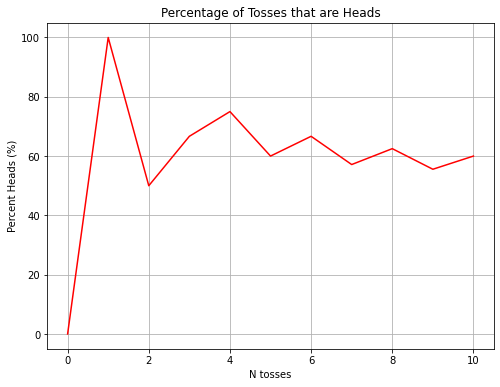

Nheads = 6, percent = 60.0
Ntails = 4, percent = 40.0


In [8]:
N = 10 # total number of times we toss a coin

Nheads = 0 # this is an integer that counts each head
Ntails = 0 # this is an integer that counts each tail

# lists to store data
Ndata = []
Hdata = []
Tdata = []

for i in range(1,N+1): # i is the toss number
    num = rand.random() # select random number between 0 and 1
    
    # determine if heads or tails
    if num < 0.5:
        Nheads = Nheads + 1
    else:
        Ntails = Ntails + 1
    
    # calculate percentage of heads and tails for ith toss
    Hpercent = Nheads/i*100
    Tpercent = Ntails/i*100
    
    # store results in lists for graphing
    Ndata.append(i)
    Hdata.append(Hpercent)
    Tdata.append(Tpercent)

# plot the calculated data
plt.figure(figsize=(8,6))
plt.title('Percentage of Tosses that are Heads')
plt.xlabel('N tosses')
plt.ylabel('Percent Heads (%)')
plt.grid(which='both', axis='both')
plt.plot(Ndata,Hdata,'r-')
plt.show()

print("Nheads = {:d}, percent = {:.1f}".format(Nheads, Hpercent))
print("Ntails = {:d}, percent = {:.1f}".format(Ntails, Tpercent))

# Example - Game of Chance

In this example inspired by an article in [Towards AI on medium.com](https://medium.com/towards-artificial-intelligence/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8#6185), we will explore the general question: "How do casinos earn money?" In this case, we have a simplified casino game where a playeer selects a chip from a bag of chips. The rules are:

- There are chips containing numbers ranging from 1–100 in a bag.
- Players can bet on even or odd chips. If they win, they double the money waged. If they lose, they lose the money waged.
- In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number. Therefore:
  - if we bet on even numbers and we get 10 then we lose.
  - if we bet on odd numbers and we get 11 then we lose.

As a result of these rules, there are 100 possible outcomes when you select a chip from the bag. In 49 of the possible outcomes, you will win. In 51 of the possible outcomes you will lose. Therefore, the house (i.e. casino) always has a higher probability of winning than you do.

The probability you will win is $49/100 = 0.49$ or 49%.

The probability you will lose is $51/100 = 0.51$ or 51%.

The difference in the probabilities (2%) is in favor of the house and is called the **house edge**. Another way to think about it is, for every \\$100 you bet, the house earns \\$2. Sure the house doesn't win every bet. But on average, for a large amount of money wagered, the house will win 2% of money wagered which is \\$2 on every \\$100.

**Your job as a casino consultant is to simulate a person who starts with \\$10,000 and bets \\$100 per draw of a chip for a total of 50 bets.**

## Exercise 1

How much money do you expect the house to earn, on average, for this customer?

### Define the Model

Run each of the code blocks below which implements the model in Python.

In [9]:
def bet(choice="Even"):

    #Get random number between 1-100.
    note = rand.randint(1,100)

    #For even :
    if choice=="Even":
        # 10 is not considered an even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

    #For odd :        
    elif choice=="Odd":
        # 11 is not considered an odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  

#Main function :
def play(bet_money, total_bets, choice="Even"):

    total_money = 0
    num_of_plays = []
    money = []
    
    num_of_plays.append(0)
    money.append(total_money)
      
    for play in range(1,total_bets): #Start with play=1
        #Win :
        if bet(choice):
            #Add money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Subtract money from our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.figure()
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)
    plt.grid(which='both', axis='both')
    plt.show()

    return(total_money)

### Run the Model

Run the Python function `play()` with the following syntax:

```
play(bet_money, total_bets, choice="Even")
```

where `bet_money` is the amount of money the person bets each time a chip is drawn, `total_bets` is the total number of times a chip will be drawn and `choice` is "Even" for a bet on an even chip and "Odd" for a bet on an odd chip.

The result is a graph that shows the total money made (positive) or lost (negative) after each bet by the player.

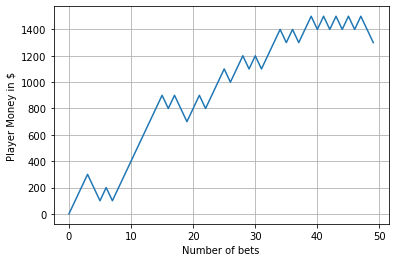

The gambler gains (or loses if negative) $1300


In [13]:
gambler_profit = play(100, 50, "Even")
print("The gambler gains (or loses if negative) ${:.0f}".format(gambler_profit))

## Exercise 2

For 100 dollars waged, we expect the player to lose 2 dollars on each bet, or 100 dollars on 50 bets. But sometimes the player makes or loses much more than this.

**Over the long run, by continuing to place more and more bets, do we expect the player to earn money or lose money?**

Investigate this question with your model. Copy the previous cell of code and paste it below.

Copy the previous cell of code and paste it below. Instead of 100 bets, run it for 500 bets.

Run it for 1000 bets.

Run it for 10,000 bets.

Run it for 100,000 bets.

If you are a gambler, should you bet fewer times or more times?

If waging \\$100 per bet, we expect the player to lose \\$2 per bet. How much did this gambler lose per bet for 100,000 bets the last time you ran your model?

What do you expect the slope of the graph to be?

For 50 bets, do you expect the same slope as for 100,000?